# Calculation of SVD

In [2]:
# Singular-value decomposition
from numpy import array
from scipy.linalg import svd
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
# SVD
U, s, VT = svd(A)
print(U)
print(s)
print(VT)

[[1 2]
 [3 4]
 [5 6]]
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
[9.52551809 0.51430058]
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


# Pseudoinverse matrix

If $A=U\Sigma V^T$ then pseudoinverse matrix is defind as

$A^+ = VD^+U^T$

If $\Sigma = \begin{bmatrix}
s11&0&0\\
 0&s22&0\\
           0&0&s33
\end{bmatrix}$

then 

 $D^+ = \begin{bmatrix}
1/s11&0&0\\
 0&1/s22&0\\
           0&0&1/s33
\end{bmatrix}$

In [3]:
# Pseudoinverse
from numpy import array
from numpy.linalg import pinv
# define matrix
A = array([
	[0.1, 0.2],
	[0.3, 0.4],
	[0.5, 0.6],
	[0.7, 0.8]])
print(A)
# calculate pseudoinverse
B = pinv(A)
print(B)

[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]
 [0.7 0.8]]
[[-1.00000000e+01 -5.00000000e+00  1.28785871e-14  5.00000000e+00]
 [ 8.50000000e+00  4.50000000e+00  5.00000000e-01 -3.50000000e+00]]


In [4]:

# Pseudoinverse via SVD
from numpy import array
from numpy.linalg import svd
from numpy import zeros
from numpy import diag
# define matrix
A = array([
 [0.1, 0.2],
 [0.3, 0.4],
 [0.5, 0.6],
 [0.7, 0.8]])
print(A)
# calculate svd
U, s, VT = svd(A)
# reciprocals of s
d = 1.0 / s
# create m x n D matrix
D = zeros(A.shape)
# populate D with n x n diagonal matrix
D[:A.shape[1], :A.shape[1]] = diag(d)
# calculate pseudoinverse
B = VT.T.dot(D.T).dot(U.T)
print(B)

[[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]
 [0.7 0.8]]
[[-1.00000000e+01 -5.00000000e+00  1.28508315e-14  5.00000000e+00]
 [ 8.50000000e+00  4.50000000e+00  5.00000000e-01 -3.50000000e+00]]


# Reduction of dimension

In [5]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16,8]

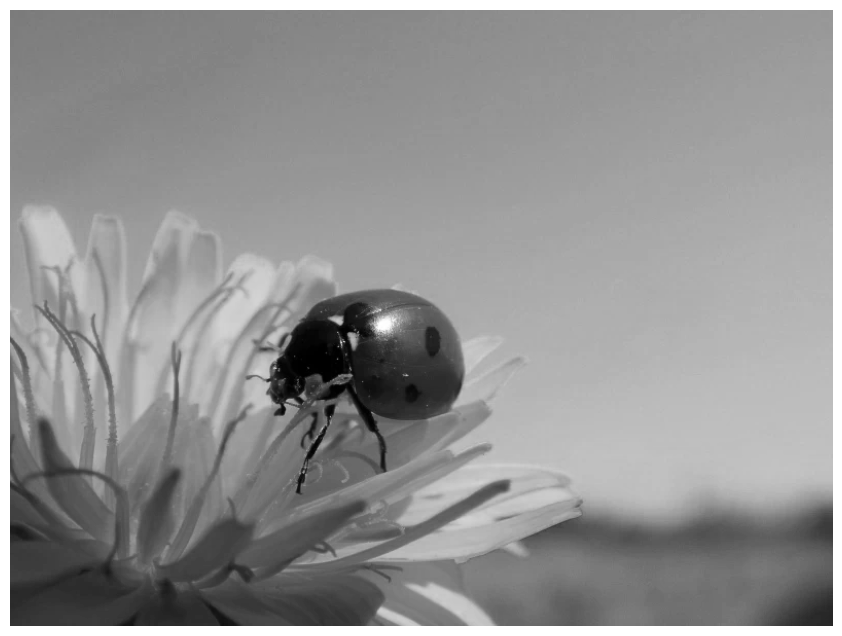

In [6]:
A = imread('1.webp')
X = np.mean(A,-1) # convert RGB to grayscale

#img = plt.imshow(256-X)
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

(599,)


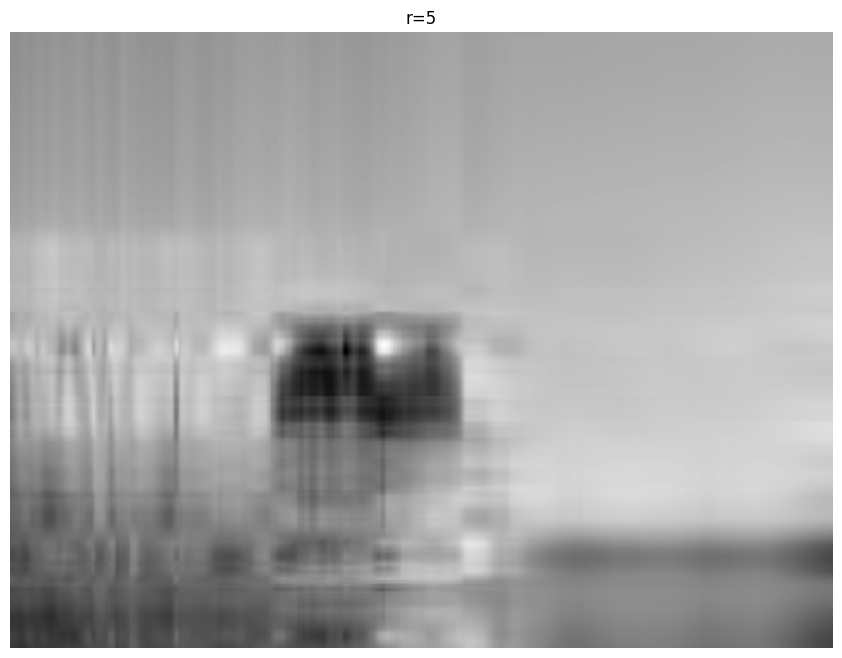

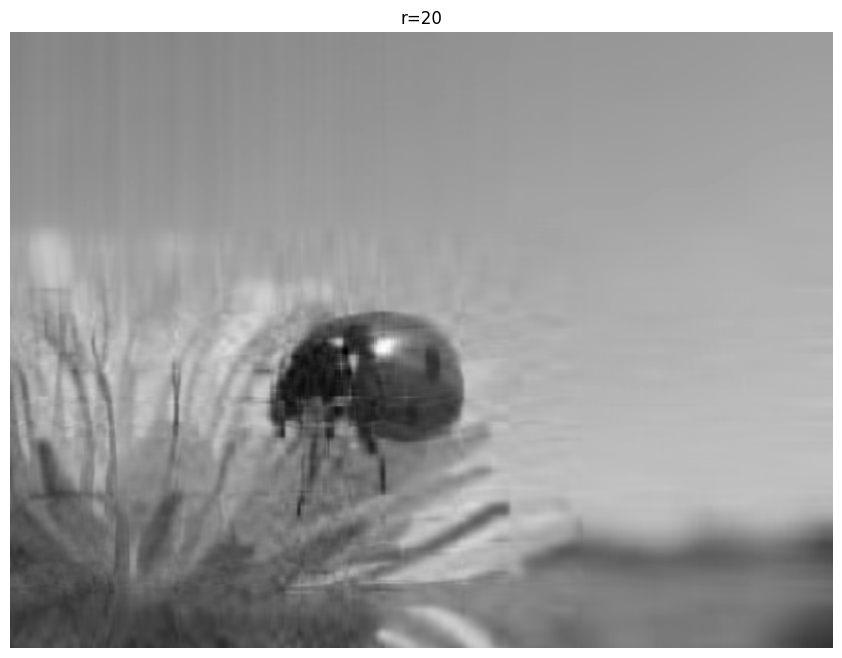

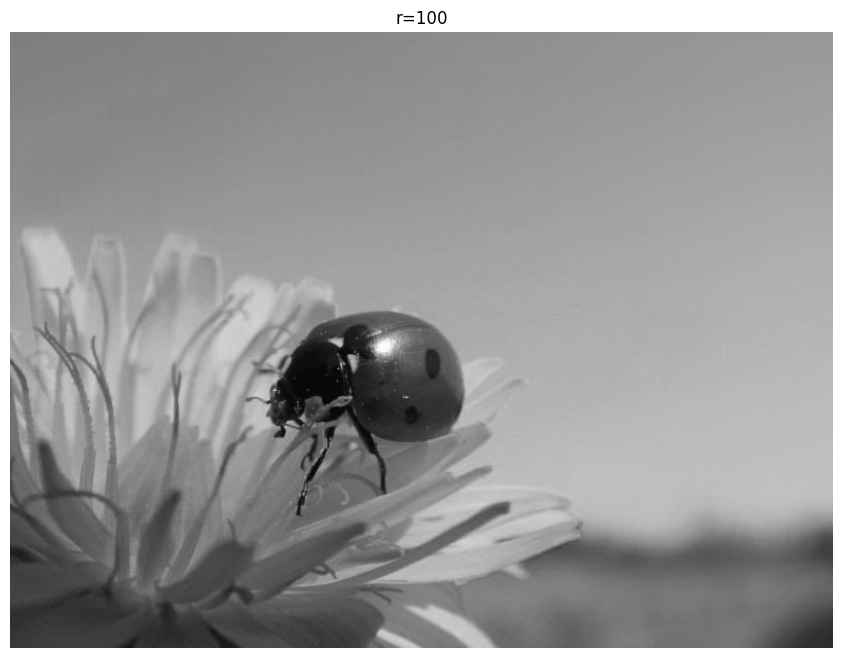

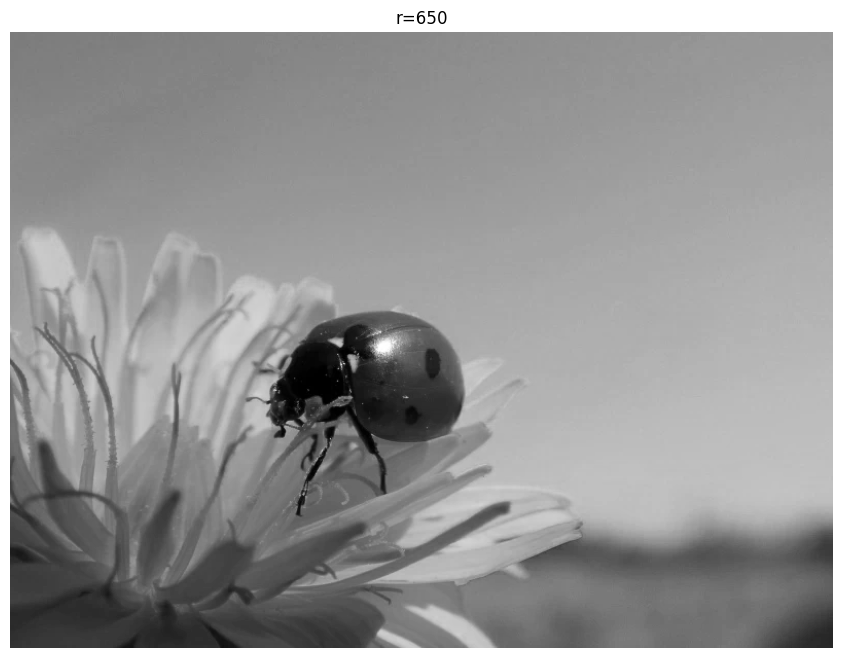

In [7]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
print(S.shape)
S = np.diag(S)

j=0
for r in (5,20,100,650):
    # Construct approximate image
    Xapprox = U[:,:r]@S[0:r,:r]@VT[:r,:]
    plt.figure(j+1)
    j += 1
    #img = plt.imshow(256-Xapprox)
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r='+str(r))
    plt.show()

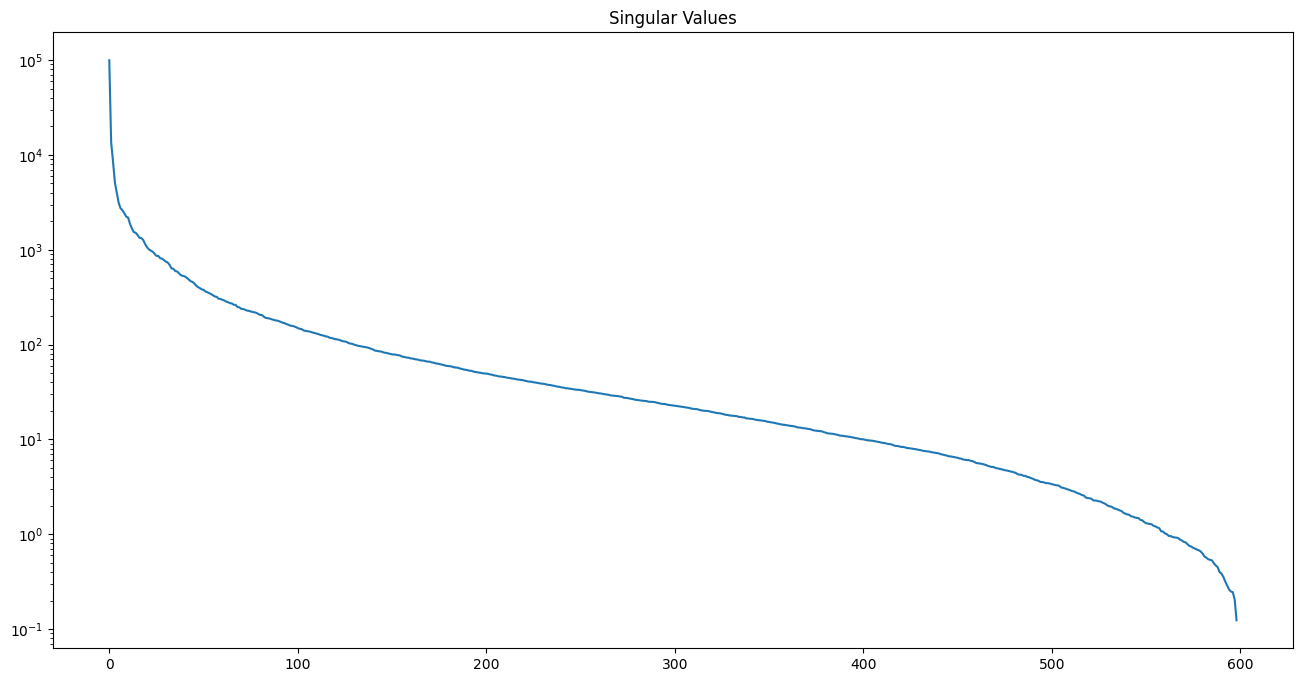

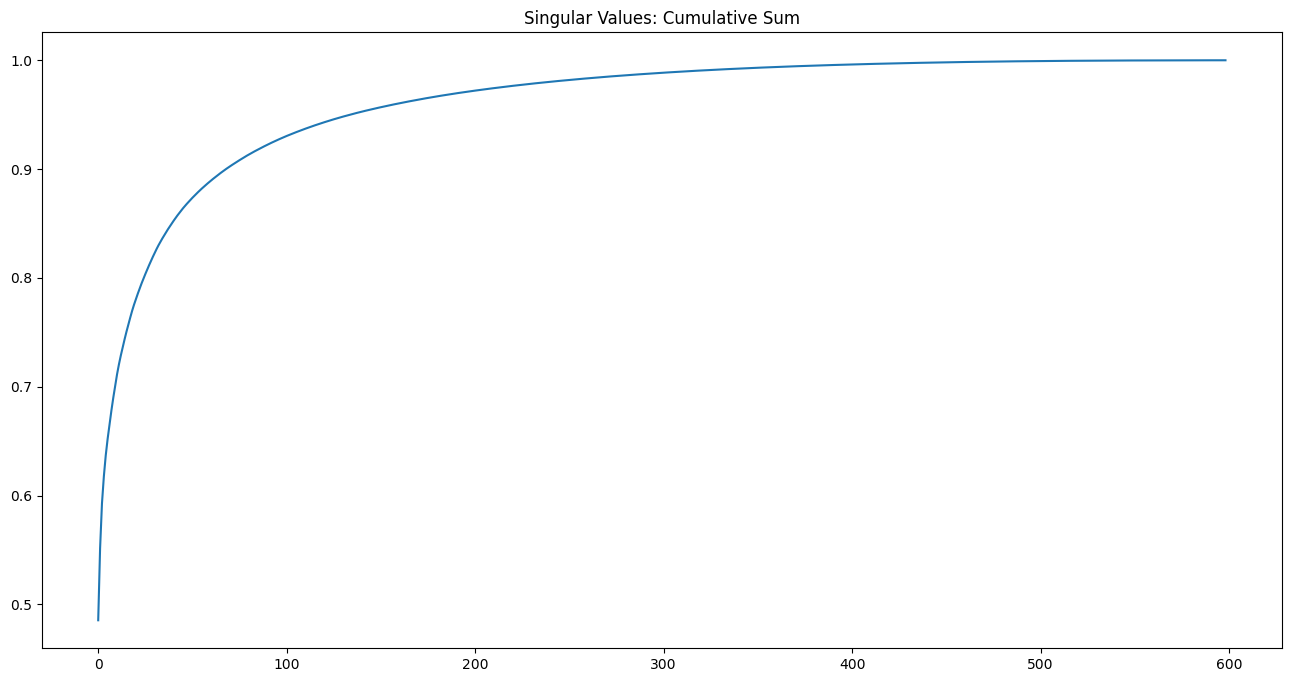

In [8]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()